<a href="https://colab.research.google.com/github/lj89/Colab/blob/master/QTW_CS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [16]:
N= int(0.02*10999999) # too challenging for my computer to read in entire data, so subsample about 2% for this assignment

directory = 'C:/Users/N1110/Desktop/QTW/CS6/'
df = pd.read_csv(directory + 'HIGGS.csv', nrows=N,header=None)  # , header=None
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [17]:
df.shape

# 20%
# Out[11]:
# (2199999, 29)

#when read in entire data (10,999,999, 29)

(219999, 29)

In [18]:
cols=['class label','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']

df.columns=cols

In [19]:
df.dtypes

class label                 float64
lepton pT                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       

In [20]:
df.isnull().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [22]:
#save to csv for future use
df.to_csv("./HIGGS2.csv", sep=',',index=False)

In [2]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!! took extremely long time to import the complete data. avoid run the code above on personal computer. run from here.
# acutally still take long to import 2% of the data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from time import time

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [4]:

import tensorflow as tf;print("tensorflow:",tf.__version__)
from tensorflow.keras import layers

tensorflow: 2.0.0-alpha0


In [5]:
directory = 'C:/Users/N1110/Desktop/QTW/CS6/'
df_HIGGS= pd.read_csv(directory + 'HIGGS2.csv')  # , header=None
df_HIGGS.head() 

,class label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [6]:
df_HIGGS.shape

(219999, 29)

In [7]:
df_HIGGS['class label'].value_counts() #about the same distribution as original data. good

1.0    116163
0.0    103836
Name: class label, dtype: int64

In [8]:

df_HIGGS.isna().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [9]:
features=['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']

In [10]:
y= np.array(df_HIGGS['class label'])

X =np.array(df_HIGGS[features])

In [11]:
#it's good practice to Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)
scaled_train_df = pd.DataFrame(scaled_train, columns=features)

In [16]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [17]:

print(len(y_test))
print(len(y_train))

44000
175999


In [18]:
# want to test activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], dropout [0.1,0.2, 0.3, 0.5]


In [51]:
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")


In [20]:
tf.compat.v1.disable_eager_execution() #disable eager execution,since got error AttributeError: Tensor.graph is meaningless when eager execution is enabled.

In [48]:
def tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=1, units=300, activation_func='tanh',learning_rate=2e-5,
                           metrics=['mean_squared_error'],batch_size=1000,epochs=5
                          ,weight_decay=1e-5):   
    model= tf.keras.Sequential()
    model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(layers.Dropout(0.5))
    
    for i in range(Num_layers):
        model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
        
        
    model.add(layers.Dense(1 ,activation='sigmoid'))

    #compile the model
    model.compile(tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9), #optimizer=tf.train.GradientDescentOptimizer(learning_rate),
                  loss = 'binary_crossentropy',# 'sparse_categorical_crossentropy',
                  metrics=metrics)
    # fit the model
    results = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, callbacks=[tb]) #
    
    #add AUC curve
    # credit: https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
    
    y_pred_keras = model.predict(X_test)[:, 0]
    print(model.summary())
    #print(y_pred_keras.shape)
    
    if (Num_layers==1):
        figure_Name = "NN_"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    else:
        figure_Name = "DN_"+str(Num_layers)+"_layer"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    
    plt.plot(results.history['loss'], label='train')
    plt.plot(results.history['val_loss'], label='test')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig(figure_Name+"_loss.png")
    plt.show()
    
    
#     Draw ROC 
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#     plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.savefig(figure_Name+"_ROC.png")
    plt.show()

Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 25s 141us/sample - loss: 0.6830 - mean_squared_error: 0.2390 - val_loss: 0.6570 - val_mean_squared_error: 0.2270
Epoch 2/5
175999/175999 [==============================] - 22s 124us/sample - loss: 0.6670 - mean_squared_error: 0.2315 - val_loss: 0.6571 - val_mean_squared_error: 0.2272
Epoch 3/5
175999/175999 [==============================] - 19s 110us/sample - loss: 0.6545 - mean_squared_error: 0.2258 - val_loss: 0.6308 - val_mean_squared_error: 0.2151
Epoch 4/5
175999/175999 [==============================] - 22s 125us/sample - loss: 0.6384 - mean_squared_error: 0.2184 - val_loss: 0.6198 - val_mean_squared_error: 0.2101
Epoch 5/5
175999/175999 [==============================] - 23s 129us/sample - loss: 0.6274 - mean_squared_error: 0.2135 - val_loss: 0.6100 - val_mean_squared_error: 0.2058
Model: "sequential_11"
_________________________________________________________________


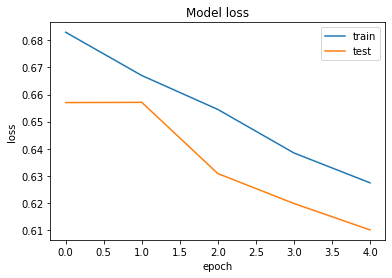

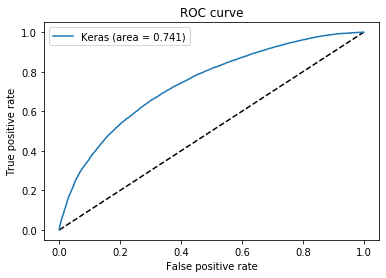

In [49]:
# the model below is using the NN achi in paper on page 6
tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=4, units=300,learning_rate=0.05,weight_decay=1e-5)

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 17s 96us/sample - loss: 0.6794 - mean_squared_error: 0.2387 - val_loss: 0.6543 - val_mean_squared_error: 0.2270
Epoch 2/5
175999/175999 [==============================] - 16s 93us/sample - loss: 0.6644 - mean_squared_error: 0.2317 - val_loss: 0.6482 - val_mean_squared_error: 0.2242
Epoch 3/5
175999/175999 [==============================] - 19s 106us/sample - loss: 0.6546 - mean_squared_error: 0.2272 - val_loss: 0.6353 - val_mean_squared_error: 0.2184
Epoch 4/5
175999/175999 [==============================] - 20s 115us/sample - loss: 0.6403 - mean_squared_error: 0.2206 - val_loss: 0.6237 - val_mean_squared_error: 0.2133
Epoch 5/5
175999/175999 [==============================] - 19s 108us/sample - loss: 0.6281 - mean_squared_error: 0.2151 - val_loss: 0.6114 - val_mean_squared_error: 0.2078
Model: "sequential_12"
______________________________________________________

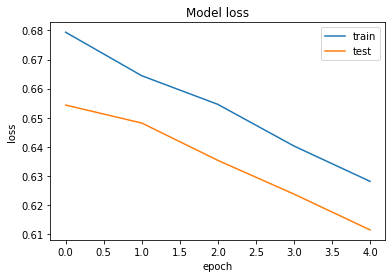

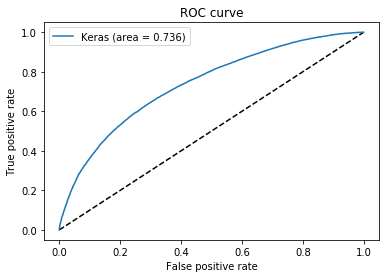

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 21s 121us/sample - loss: 0.6779 - mean_squared_error: 0.2380 - val_loss: 0.6548 - val_mean_squared_error: 0.2272
Epoch 2/5
175999/175999 [==============================] - 17s 95us/sample - loss: 0.6631 - mean_squared_error: 0.2311 - val_loss: 0.6457 - val_mean_squared_error: 0.2232
Epoch 3/5
175999/175999 [==============================] - 20s 112us/sample - loss: 0.6483 - mean_squared_error: 0.2243 - val_loss: 0.6252 - val_mean_squared_error: 0.2140
Epoch 4/5
175999/175999 [==============================] - 20s 114us/sample - loss: 0.6342 - mean_squared_error: 0.2178 - val_loss: 0.6176 - val_mean_squared_error: 0.2108
Epoch 5/5
175999/175999 [==============================] - 17s 94us/sample - loss: 0.6237 - mean_squared_error: 0.2131 - val_loss: 0.6112 - val_mean_squared_error: 0.2080
Model: "sequential_13"
______________________________________________________

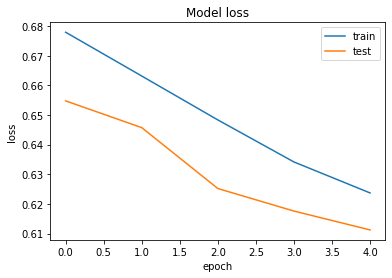

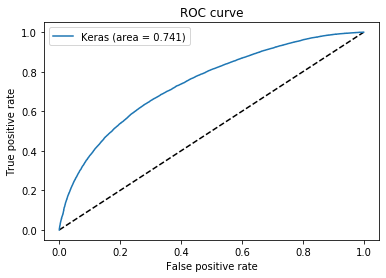

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 18s 102us/sample - loss: 0.7235 - mean_squared_error: 0.2598 - val_loss: 0.7097 - val_mean_squared_error: 0.2534
Epoch 2/5
175999/175999 [==============================] - 16s 92us/sample - loss: 0.7167 - mean_squared_error: 0.2566 - val_loss: 0.7048 - val_mean_squared_error: 0.2510
Epoch 3/5
175999/175999 [==============================] - 17s 98us/sample - loss: 0.7144 - mean_squared_error: 0.2555 - val_loss: 0.7027 - val_mean_squared_error: 0.2500
Epoch 4/5
175999/175999 [==============================] - 15s 86us/sample - loss: 0.7129 - mean_squared_error: 0.2548 - val_loss: 0.7016 - val_mean_squared_error: 0.2494
Epoch 5/5
175999/175999 [==============================] - 15s 83us/sample - loss: 0.7114 - mean_squared_error: 0.2541 - val_loss: 0.7007 - val_mean_squared_error: 0.2490
Model: "sequential_14"
________________________________________________________

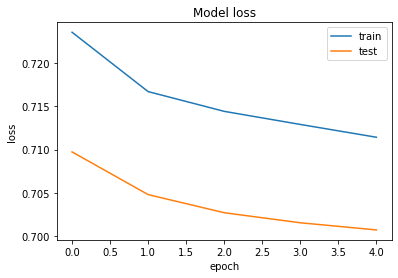

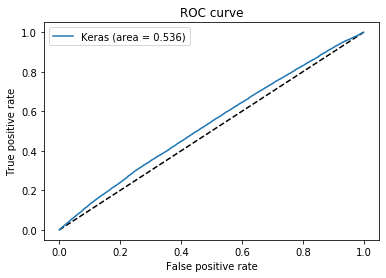

DN- 3  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 19s 107us/sample - loss: 0.7200 - mean_squared_error: 0.2582 - val_loss: 0.7087 - val_mean_squared_error: 0.2530
Epoch 2/5
175999/175999 [==============================] - 15s 88us/sample - loss: 0.7176 - mean_squared_error: 0.2571 - val_loss: 0.7070 - val_mean_squared_error: 0.2521
Epoch 3/5
175999/175999 [==============================] - 16s 88us/sample - loss: 0.7165 - mean_squared_error: 0.2565 - val_loss: 0.7057 - val_mean_squared_error: 0.2515
Epoch 4/5
175999/175999 [==============================] - 16s 89us/sample - loss: 0.7153 - mean_squared_error: 0.2559 - val_loss: 0.7047 - val_mean_squared_error: 0.2510
Epoch 5/5
175999/175999 [==============================] - 15s 88us/sample - loss: 0.7143 - mean_squared_error: 0.2555 - val_loss: 0.7039 - val_mean_squared_error: 0.2506
Model: "sequential_15"
________________________________________________________

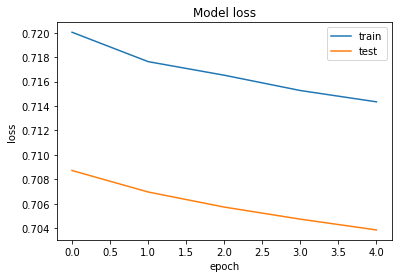

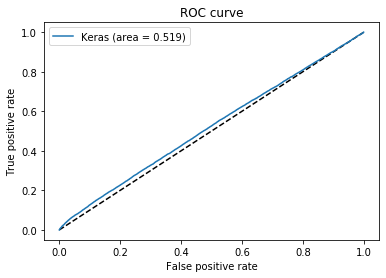

DN- 4  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 22s 127us/sample - loss: 0.6837 - mean_squared_error: 0.2394 - val_loss: 0.6582 - val_mean_squared_error: 0.2275
Epoch 2/5
175999/175999 [==============================] - 23s 130us/sample - loss: 0.6670 - mean_squared_error: 0.2315 - val_loss: 0.6499 - val_mean_squared_error: 0.2237
Epoch 3/5
175999/175999 [==============================] - 23s 133us/sample - loss: 0.6550 - mean_squared_error: 0.2260 - val_loss: 0.6383 - val_mean_squared_error: 0.2184
Epoch 4/5
175999/175999 [==============================] - 23s 131us/sample - loss: 0.6412 - mean_squared_error: 0.2197 - val_loss: 0.6194 - val_mean_squared_error: 0.2100
Epoch 5/5
175999/175999 [==============================] - 22s 126us/sample - loss: 0.6307 - mean_squared_error: 0.2150 - val_loss: 0.6162 - val_mean_squared_error: 0.2086
Model: "sequential_16"
____________________________________________________

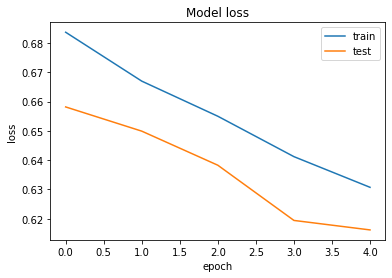

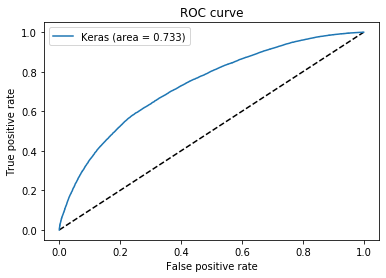

DN- 4  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 28s 157us/sample - loss: 0.6817 - mean_squared_error: 0.2384 - val_loss: 0.6566 - val_mean_squared_error: 0.2268
Epoch 2/5
175999/175999 [==============================] - 25s 143us/sample - loss: 0.6637 - mean_squared_error: 0.2300 - val_loss: 0.6394 - val_mean_squared_error: 0.2188
Epoch 3/5
175999/175999 [==============================] - 22s 126us/sample - loss: 0.6458 - mean_squared_error: 0.2218 - val_loss: 0.6233 - val_mean_squared_error: 0.2119
Epoch 4/5
175999/175999 [==============================] - 19s 109us/sample - loss: 0.6342 - mean_squared_error: 0.2165 - val_loss: 0.6207 - val_mean_squared_error: 0.2106
Epoch 5/5
175999/175999 [==============================] - 22s 123us/sample - loss: 0.6270 - mean_squared_error: 0.2132 - val_loss: 0.6156 - val_mean_squared_error: 0.2083
Model: "sequential_17"
____________________________________________________

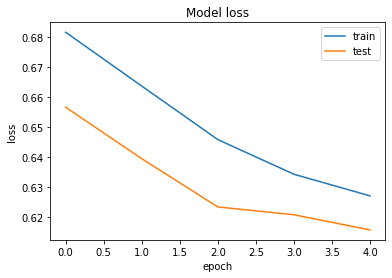

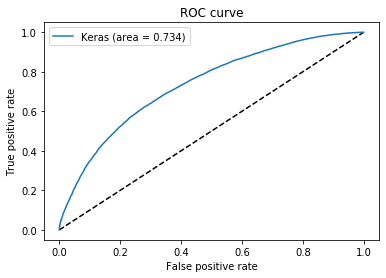

DN- 4  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 34s 195us/sample - loss: 0.7198 - mean_squared_error: 0.2567 - val_loss: 0.7133 - val_mean_squared_error: 0.2537
Epoch 2/5
175999/175999 [==============================] - 21s 121us/sample - loss: 0.7187 - mean_squared_error: 0.2562 - val_loss: 0.7121 - val_mean_squared_error: 0.2531
Epoch 3/5
175999/175999 [==============================] - 23s 132us/sample - loss: 0.7176 - mean_squared_error: 0.2557 - val_loss: 0.7110 - val_mean_squared_error: 0.2525
Epoch 4/5
175999/175999 [==============================] - 25s 142us/sample - loss: 0.7160 - mean_squared_error: 0.2549 - val_loss: 0.7100 - val_mean_squared_error: 0.2521
Epoch 5/5
175999/175999 [==============================] - 25s 142us/sample - loss: 0.7158 - mean_squared_error: 0.2548 - val_loss: 0.7091 - val_mean_squared_error: 0.2516
Model: "sequential_18"
____________________________________________________

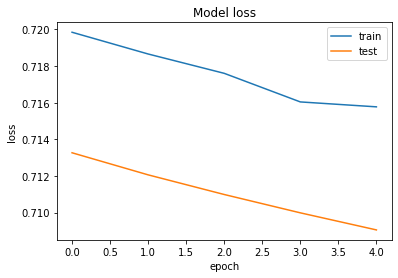

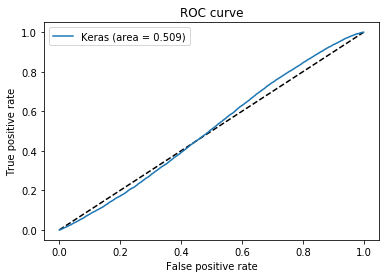

DN- 4  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 34s 194us/sample - loss: 0.7195 - mean_squared_error: 0.2567 - val_loss: 0.7099 - val_mean_squared_error: 0.2521
Epoch 2/5
175999/175999 [==============================] - 22s 127us/sample - loss: 0.7182 - mean_squared_error: 0.2560 - val_loss: 0.7086 - val_mean_squared_error: 0.2514
Epoch 3/5
175999/175999 [==============================] - 28s 157us/sample - loss: 0.7164 - mean_squared_error: 0.2552 - val_loss: 0.7077 - val_mean_squared_error: 0.2510
Epoch 4/5
175999/175999 [==============================] - 27s 152us/sample - loss: 0.7157 - mean_squared_error: 0.2548 - val_loss: 0.7070 - val_mean_squared_error: 0.2506
Epoch 5/5
175999/175999 [==============================] - 25s 144us/sample - loss: 0.7150 - mean_squared_error: 0.2545 - val_loss: 0.7063 - val_mean_squared_error: 0.2503
Model: "sequential_19"
____________________________________________________

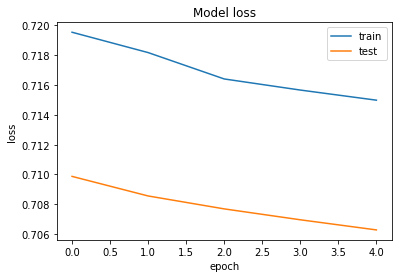

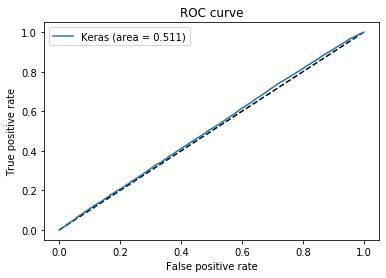

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 36s 203us/sample - loss: 0.6870 - mean_squared_error: 0.2395 - val_loss: 0.6698 - val_mean_squared_error: 0.2314
Epoch 2/5
175999/175999 [==============================] - 29s 166us/sample - loss: 0.6690 - mean_squared_error: 0.2311 - val_loss: 0.6535 - val_mean_squared_error: 0.2242
Epoch 3/5
175999/175999 [==============================] - 27s 155us/sample - loss: 0.6533 - mean_squared_error: 0.2239 - val_loss: 0.6324 - val_mean_squared_error: 0.2144
Epoch 4/5
175999/175999 [==============================] - 23s 130us/sample - loss: 0.6401 - mean_squared_error: 0.2178 - val_loss: 0.6235 - val_mean_squared_error: 0.2106
Epoch 5/5
175999/175999 [==============================] - 24s 136us/sample - loss: 0.6305 - mean_squared_error: 0.2134 - val_loss: 0.6112 - val_mean_squared_error: 0.2051
Model: "sequential_20"
____________________________________________________

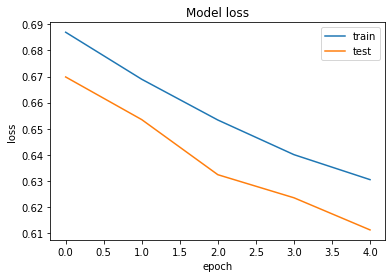

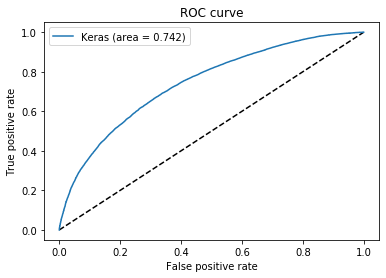

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 29s 167us/sample - loss: 0.6857 - mean_squared_error: 0.2389 - val_loss: 0.6618 - val_mean_squared_error: 0.2277
Epoch 2/5
175999/175999 [==============================] - 21s 120us/sample - loss: 0.6681 - mean_squared_error: 0.2307 - val_loss: 0.6470 - val_mean_squared_error: 0.2212
Epoch 3/5
175999/175999 [==============================] - 24s 137us/sample - loss: 0.6500 - mean_squared_error: 0.2223 - val_loss: 0.6328 - val_mean_squared_error: 0.2148
Epoch 4/5
175999/175999 [==============================] - 24s 139us/sample - loss: 0.6378 - mean_squared_error: 0.2168 - val_loss: 0.6181 - val_mean_squared_error: 0.2081
Epoch 5/5
175999/175999 [==============================] - 22s 122us/sample - loss: 0.6283 - mean_squared_error: 0.2125 - val_loss: 0.6122 - val_mean_squared_error: 0.2055
Model: "sequential_21"
____________________________________________________

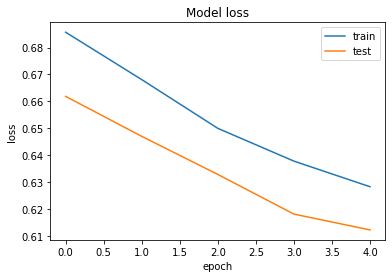

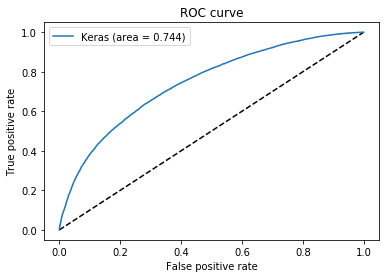

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 32s 179us/sample - loss: 0.7207 - mean_squared_error: 0.2558 - val_loss: 0.7131 - val_mean_squared_error: 0.2521
Epoch 2/5
175999/175999 [==============================] - 28s 162us/sample - loss: 0.7195 - mean_squared_error: 0.2552 - val_loss: 0.7118 - val_mean_squared_error: 0.2515
Epoch 3/5
175999/175999 [==============================] - 26s 150us/sample - loss: 0.7173 - mean_squared_error: 0.2541 - val_loss: 0.7107 - val_mean_squared_error: 0.2510
Epoch 4/5
175999/175999 [==============================] - 31s 175us/sample - loss: 0.7168 - mean_squared_error: 0.2539 - val_loss: 0.7097 - val_mean_squared_error: 0.2505
Epoch 5/5
175999/175999 [==============================] - 27s 155us/sample - loss: 0.7160 - mean_squared_error: 0.2535 - val_loss: 0.7088 - val_mean_squared_error: 0.2500
Model: "sequential_22"
____________________________________________________

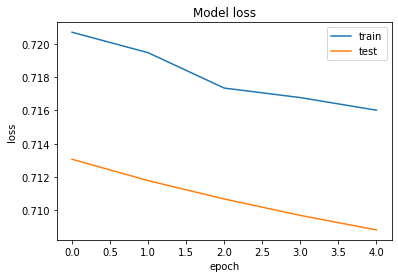

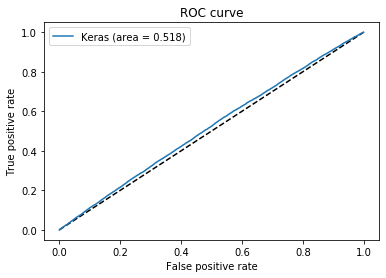

DN- 5  layers
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 23s 129us/sample - loss: 0.7253 - mean_squared_error: 0.2580 - val_loss: 0.7165 - val_mean_squared_error: 0.2539
Epoch 2/5
175999/175999 [==============================] - 21s 120us/sample - loss: 0.7229 - mean_squared_error: 0.2568 - val_loss: 0.7144 - val_mean_squared_error: 0.2528
Epoch 3/5
175999/175999 [==============================] - 22s 123us/sample - loss: 0.7210 - mean_squared_error: 0.2559 - val_loss: 0.7129 - val_mean_squared_error: 0.2521
Epoch 4/5
175999/175999 [==============================] - 23s 129us/sample - loss: 0.7196 - mean_squared_error: 0.2552 - val_loss: 0.7117 - val_mean_squared_error: 0.2515
Epoch 5/5
175999/175999 [==============================] - 26s 149us/sample - loss: 0.7185 - mean_squared_error: 0.2547 - val_loss: 0.7105 - val_mean_squared_error: 0.2509
Model: "sequential_23"
____________________________________________________

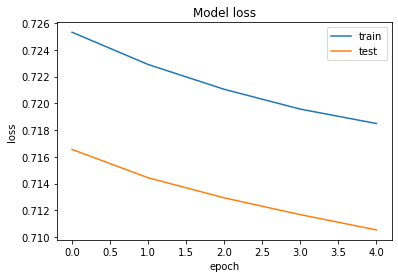

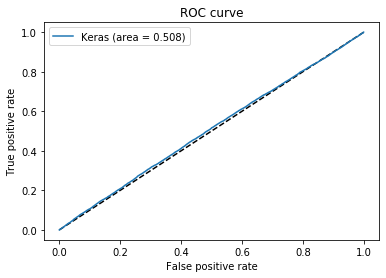

In [54]:
#another repeatation with NN achi print out. above one is confusing. 
# we can also see some varations in the output with some NN. so there is randomness since we did not use seed.

#tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=4, units=300,learning_rate=0.05,weight_decay=1e-5)

#"DN_"+str(Num_layers)+"_layer"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(activation_func)+"_activation_func_"

#%%time
layer_list = [3,4,5]
units_list = [300] #[100, 200, 300, 500]
init_learning_rate_list= [0.05,2e-5] #you can add more lr options when run on GPU
weight_decay_list=[0.00001]
#weight_decay_list=[0,0.00001]
activation_func_list = ['relu', 'tanh']

auc_deep = pd.DataFrame(columns=["layer","auc"])
i = 0

for layer in layer_list:
    for units in units_list:
        for learning_rate in init_learning_rate_list:
            for activation_func in activation_func_list:
                for weight_decay in weight_decay_list:
                    print("DN-",layer," layers")  #better print out all parameters used for make pick out best model easy!!!!!!!!!!!!!
                    auc_score= tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=layer, units=units,learning_rate=learning_rate,weight_decay=weight_decay)
                    auc_deep.loc[i]=[layer,auc_score]
                    i+=1

DN- 3  layers LR- 0.05 activation_func- relu
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 20s 115us/sample - loss: 0.6802 - mean_squared_error: 0.2391 - val_loss: 0.6582 - val_mean_squared_error: 0.2288
Epoch 2/5
175999/175999 [==============================] - 18s 101us/sample - loss: 0.6652 - mean_squared_error: 0.2321 - val_loss: 0.6487 - val_mean_squared_error: 0.2246
Epoch 3/5
175999/175999 [==============================] - 19s 105us/sample - loss: 0.6534 - mean_squared_error: 0.2266 - val_loss: 0.6351 - val_mean_squared_error: 0.2184
Epoch 4/5
175999/175999 [==============================] - 16s 91us/sample - loss: 0.6373 - mean_squared_error: 0.2193 - val_loss: 0.6164 - val_mean_squared_error: 0.2100
Epoch 5/5
175999/175999 [==============================] - 21s 118us/sample - loss: 0.6285 - mean_squared_error: 0.2153 - val_loss: 0.6128 - val_mean_squared_error: 0.2085
Model: "sequential_25"
______________________

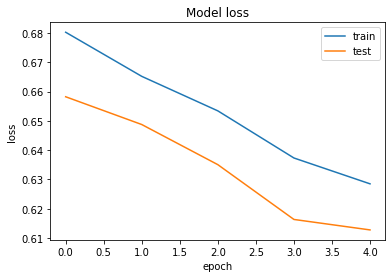

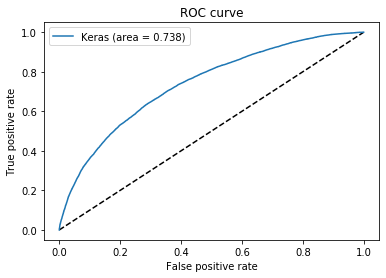

DN- 3  layers LR- 0.05 activation_func- tanh
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 21s 119us/sample - loss: 0.6791 - mean_squared_error: 0.2386 - val_loss: 0.6554 - val_mean_squared_error: 0.2276
Epoch 2/5
175999/175999 [==============================] - 18s 101us/sample - loss: 0.6641 - mean_squared_error: 0.2316 - val_loss: 0.6506 - val_mean_squared_error: 0.2254
Epoch 3/5
175999/175999 [==============================] - 19s 110us/sample - loss: 0.6564 - mean_squared_error: 0.2280 - val_loss: 0.6410 - val_mean_squared_error: 0.2211
Epoch 4/5
175999/175999 [==============================] - 16s 91us/sample - loss: 0.6436 - mean_squared_error: 0.2221 - val_loss: 0.6244 - val_mean_squared_error: 0.2135
Epoch 5/5
175999/175999 [==============================] - 17s 96us/sample - loss: 0.6322 - mean_squared_error: 0.2169 - val_loss: 0.6143 - val_mean_squared_error: 0.2089
Model: "sequential_26"
_______________________

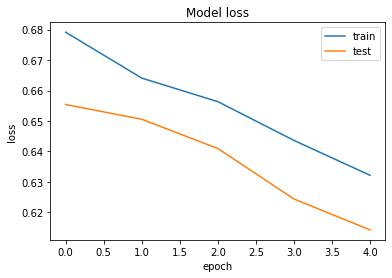

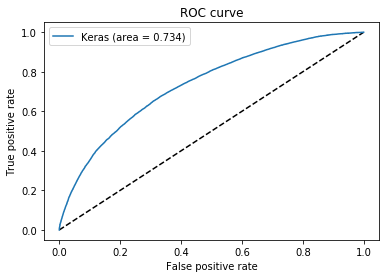

DN- 3  layers LR- 2e-05 activation_func- relu
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 16s 94us/sample - loss: 0.7244 - mean_squared_error: 0.2602 - val_loss: 0.7144 - val_mean_squared_error: 0.2556
Epoch 2/5
175999/175999 [==============================] - 13s 73us/sample - loss: 0.7218 - mean_squared_error: 0.2590 - val_loss: 0.7120 - val_mean_squared_error: 0.2545
Epoch 3/5
175999/175999 [==============================] - 13s 75us/sample - loss: 0.7205 - mean_squared_error: 0.2584 - val_loss: 0.7102 - val_mean_squared_error: 0.2536
Epoch 4/5
175999/175999 [==============================] - 19s 107us/sample - loss: 0.7182 - mean_squared_error: 0.2573 - val_loss: 0.7087 - val_mean_squared_error: 0.2529
Epoch 5/5
175999/175999 [==============================] - 12s 70us/sample - loss: 0.7167 - mean_squared_error: 0.2566 - val_loss: 0.7074 - val_mean_squared_error: 0.2523
Model: "sequential_27"
________________________

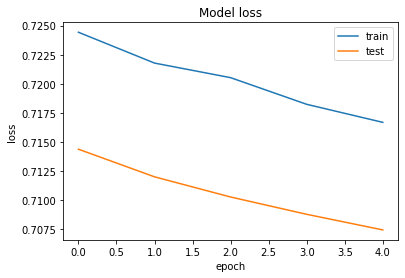

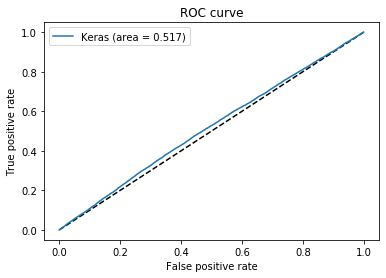

DN- 3  layers LR- 2e-05 activation_func- tanh
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 15s 86us/sample - loss: 0.7214 - mean_squared_error: 0.2589 - val_loss: 0.7084 - val_mean_squared_error: 0.2528
Epoch 2/5
175999/175999 [==============================] - 13s 71us/sample - loss: 0.7208 - mean_squared_error: 0.2586 - val_loss: 0.7073 - val_mean_squared_error: 0.2523
Epoch 3/5
175999/175999 [==============================] - 13s 71us/sample - loss: 0.7185 - mean_squared_error: 0.2575 - val_loss: 0.7063 - val_mean_squared_error: 0.2518
Epoch 4/5
175999/175999 [==============================] - 13s 77us/sample - loss: 0.7182 - mean_squared_error: 0.2574 - val_loss: 0.7053 - val_mean_squared_error: 0.2513
Epoch 5/5
175999/175999 [==============================] - 14s 81us/sample - loss: 0.7166 - mean_squared_error: 0.2566 - val_loss: 0.7045 - val_mean_squared_error: 0.2509
Model: "sequential_28"
_________________________

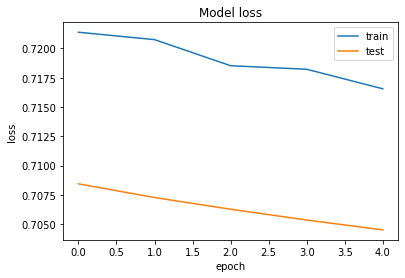

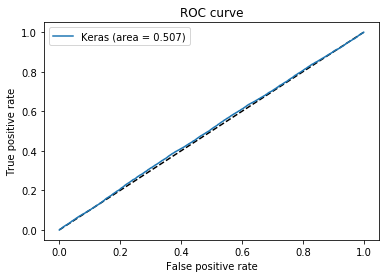

DN- 4  layers LR- 0.05 activation_func- relu
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 18s 105us/sample - loss: 0.6828 - mean_squared_error: 0.2389 - val_loss: 0.6586 - val_mean_squared_error: 0.2277
Epoch 2/5
175999/175999 [==============================] - 22s 125us/sample - loss: 0.6671 - mean_squared_error: 0.2315 - val_loss: 0.6523 - val_mean_squared_error: 0.2249
Epoch 3/5
175999/175999 [==============================] - 16s 91us/sample - loss: 0.6582 - mean_squared_error: 0.2275 - val_loss: 0.6390 - val_mean_squared_error: 0.2188
Epoch 4/5
175999/175999 [==============================] - 16s 92us/sample - loss: 0.6441 - mean_squared_error: 0.2211 - val_loss: 0.6234 - val_mean_squared_error: 0.2118
Epoch 5/5
175999/175999 [==============================] - 17s 96us/sample - loss: 0.6333 - mean_squared_error: 0.2161 - val_loss: 0.6171 - val_mean_squared_error: 0.2089
Model: "sequential_29"
________________________

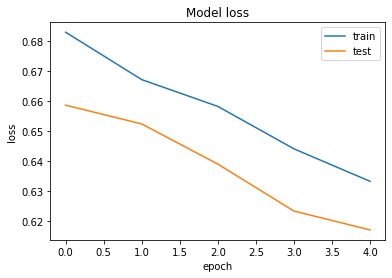

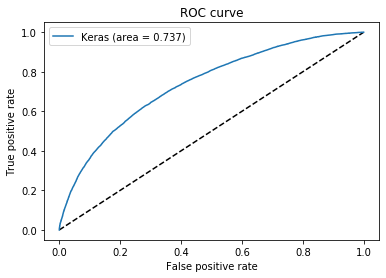

DN- 4  layers LR- 0.05 activation_func- tanh
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 26s 148us/sample - loss: 0.6820 - mean_squared_error: 0.2386 - val_loss: 0.6582 - val_mean_squared_error: 0.2274
Epoch 2/5
175999/175999 [==============================] - 24s 136us/sample - loss: 0.6654 - mean_squared_error: 0.2308 - val_loss: 0.6482 - val_mean_squared_error: 0.2229
Epoch 3/5
175999/175999 [==============================] - 26s 150us/sample - loss: 0.6552 - mean_squared_error: 0.2261 - val_loss: 0.6374 - val_mean_squared_error: 0.2182
Epoch 4/5
175999/175999 [==============================] - 20s 112us/sample - loss: 0.6382 - mean_squared_error: 0.2183 - val_loss: 0.6174 - val_mean_squared_error: 0.2091
Epoch 5/5
175999/175999 [==============================] - 19s 111us/sample - loss: 0.6292 - mean_squared_error: 0.2142 - val_loss: 0.6092 - val_mean_squared_error: 0.2055
Model: "sequential_30"
_____________________

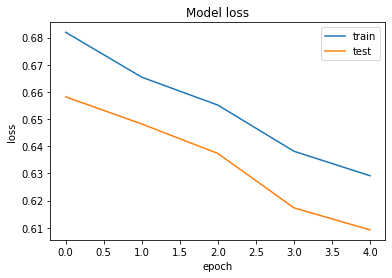

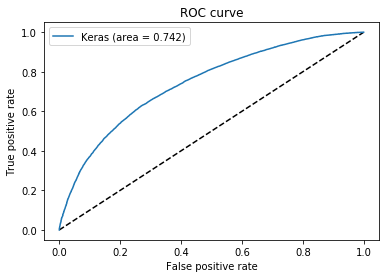

DN- 4  layers LR- 2e-05 activation_func- relu
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 15s 87us/sample - loss: 0.7249 - mean_squared_error: 0.2591 - val_loss: 0.7130 - val_mean_squared_error: 0.2536
Epoch 2/5
175999/175999 [==============================] - 15s 86us/sample - loss: 0.7211 - mean_squared_error: 0.2573 - val_loss: 0.7105 - val_mean_squared_error: 0.2523
Epoch 3/5
175999/175999 [==============================] - 14s 80us/sample - loss: 0.7199 - mean_squared_error: 0.2568 - val_loss: 0.7092 - val_mean_squared_error: 0.2517
Epoch 4/5
175999/175999 [==============================] - 19s 110us/sample - loss: 0.7184 - mean_squared_error: 0.2560 - val_loss: 0.7083 - val_mean_squared_error: 0.2512
Epoch 5/5
175999/175999 [==============================] - 15s 87us/sample - loss: 0.7175 - mean_squared_error: 0.2556 - val_loss: 0.7075 - val_mean_squared_error: 0.2508
Model: "sequential_31"
________________________

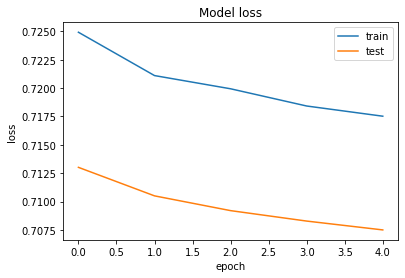

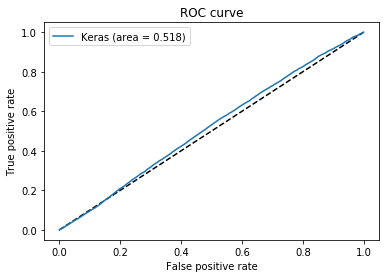

DN- 4  layers LR- 2e-05 activation_func- tanh
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 16s 93us/sample - loss: 0.7288 - mean_squared_error: 0.2608 - val_loss: 0.7179 - val_mean_squared_error: 0.2559
Epoch 2/5
175999/175999 [==============================] - 14s 82us/sample - loss: 0.7267 - mean_squared_error: 0.2599 - val_loss: 0.7154 - val_mean_squared_error: 0.2547
Epoch 3/5
175999/175999 [==============================] - 15s 83us/sample - loss: 0.7247 - mean_squared_error: 0.2590 - val_loss: 0.7133 - val_mean_squared_error: 0.2537248 
Epoch 4/5
175999/175999 [==============================] - 15s 83us/sample - loss: 0.7224 - mean_squared_error: 0.2579 - val_loss: 0.7114 - val_mean_squared_error: 0.2528
Epoch 5/5
175999/175999 [==============================] - 15s 86us/sample - loss: 0.7211 - mean_squared_error: 0.2573 - val_loss: 0.7098 - val_mean_squared_error: 0.2520
Model: "sequential_32"
_____________________

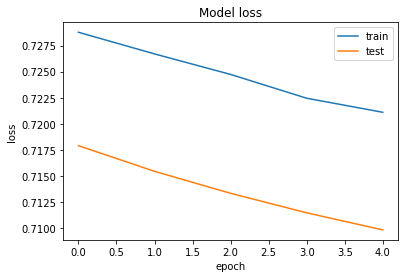

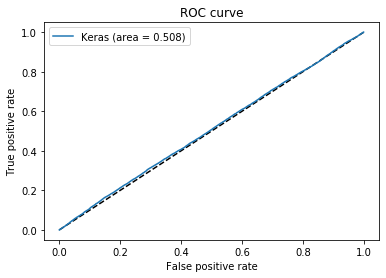

DN- 5  layers LR- 0.05 activation_func- relu
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 20s 112us/sample - loss: 0.6861 - mean_squared_error: 0.2391 - val_loss: 0.6628 - val_mean_squared_error: 0.2282
Epoch 2/5
175999/175999 [==============================] - 17s 95us/sample - loss: 0.6700 - mean_squared_error: 0.2315 - val_loss: 0.6544 - val_mean_squared_error: 0.2245
Epoch 3/5
175999/175999 [==============================] - 16s 88us/sample - loss: 0.6604 - mean_squared_error: 0.2272 - val_loss: 0.6413 - val_mean_squared_error: 0.2186
Epoch 4/5
175999/175999 [==============================] - 16s 89us/sample - loss: 0.6429 - mean_squared_error: 0.2191 - val_loss: 0.6252 - val_mean_squared_error: 0.2114
Epoch 5/5
175999/175999 [==============================] - 15s 88us/sample - loss: 0.6337 - mean_squared_error: 0.2149 - val_loss: 0.6199 - val_mean_squared_error: 0.2089
Model: "sequential_33"
_________________________

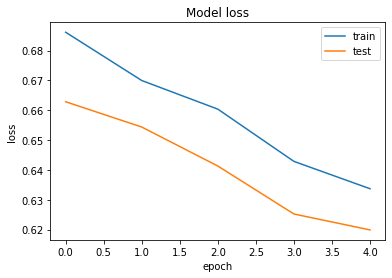

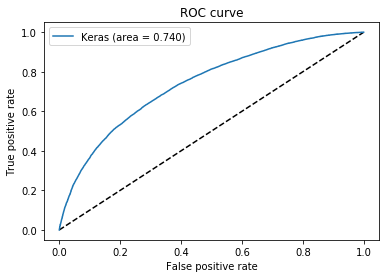

DN- 5  layers LR- 0.05 activation_func- tanh
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 18s 104us/sample - loss: 0.6854 - mean_squared_error: 0.2388 - val_loss: 0.6613 - val_mean_squared_error: 0.2275
Epoch 2/5
175999/175999 [==============================] - 16s 91us/sample - loss: 0.6697 - mean_squared_error: 0.2314 - val_loss: 0.6526 - val_mean_squared_error: 0.2237
Epoch 3/5
175999/175999 [==============================] - 14s 77us/sample - loss: 0.6574 - mean_squared_error: 0.2258 - val_loss: 0.6381 - val_mean_squared_error: 0.2172
Epoch 4/5
175999/175999 [==============================] - 13s 77us/sample - loss: 0.6432 - mean_squared_error: 0.2192 - val_loss: 0.6217 - val_mean_squared_error: 0.2096
Epoch 5/5
175999/175999 [==============================] - 14s 77us/sample - loss: 0.6325 - mean_squared_error: 0.2144 - val_loss: 0.6143 - val_mean_squared_error: 0.2066
Model: "sequential_34"
_________________________

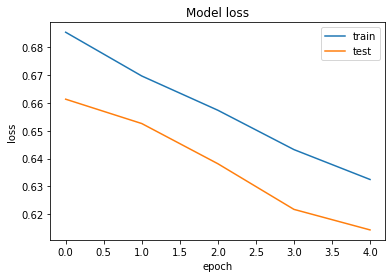

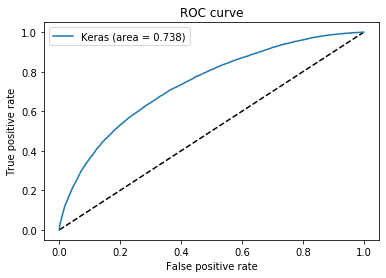

DN- 5  layers LR- 2e-05 activation_func- relu
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 18s 102us/sample - loss: 0.7215 - mean_squared_error: 0.2561 - val_loss: 0.7140 - val_mean_squared_error: 0.2526
Epoch 2/5
175999/175999 [==============================] - 21s 120us/sample - loss: 0.7204 - mean_squared_error: 0.2556 - val_loss: 0.7124 - val_mean_squared_error: 0.2518
Epoch 3/5
175999/175999 [==============================] - 18s 102us/sample - loss: 0.7192 - mean_squared_error: 0.2550 - val_loss: 0.7111 - val_mean_squared_error: 0.2512
Epoch 4/5
175999/175999 [==============================] - 20s 114us/sample - loss: 0.7185 - mean_squared_error: 0.2547 - val_loss: 0.7100 - val_mean_squared_error: 0.2507
Epoch 5/5
175999/175999 [==============================] - 17s 96us/sample - loss: 0.7169 - mean_squared_error: 0.2539 - val_loss: 0.7091 - val_mean_squared_error: 0.2502
Model: "sequential_35"
_____________________

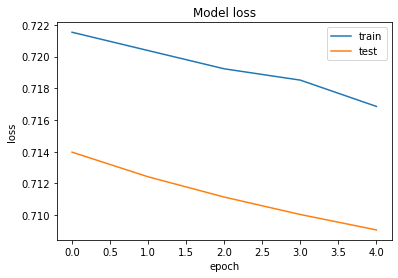

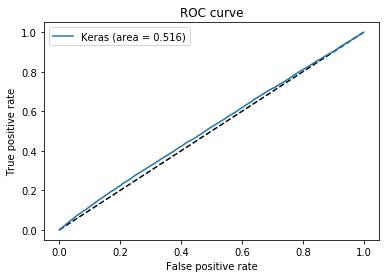

DN- 5  layers LR- 2e-05 activation_func- tanh
Train on 175999 samples, validate on 44000 samples
Epoch 1/5
175999/175999 [==============================] - 21s 119us/sample - loss: 0.7300 - mean_squared_error: 0.2601 - val_loss: 0.7221 - val_mean_squared_error: 0.2565
Epoch 2/5
175999/175999 [==============================] - 16s 90us/sample - loss: 0.7277 - mean_squared_error: 0.2591 - val_loss: 0.7199 - val_mean_squared_error: 0.2555
Epoch 3/5
175999/175999 [==============================] - 18s 103us/sample - loss: 0.7257 - mean_squared_error: 0.2581 - val_loss: 0.7179 - val_mean_squared_error: 0.2545
Epoch 4/5
175999/175999 [==============================] - 17s 94us/sample - loss: 0.7242 - mean_squared_error: 0.2574 - val_loss: 0.7162 - val_mean_squared_error: 0.2537
Epoch 5/5
175999/175999 [==============================] - 17s 96us/sample - loss: 0.7228 - mean_squared_error: 0.2568 - val_loss: 0.7147 - val_mean_squared_error: 0.2529
Model: "sequential_36"
_______________________

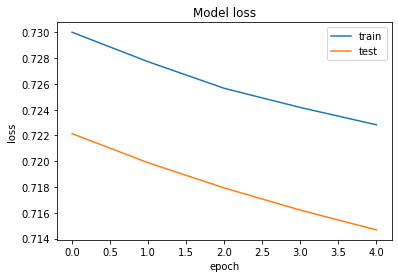

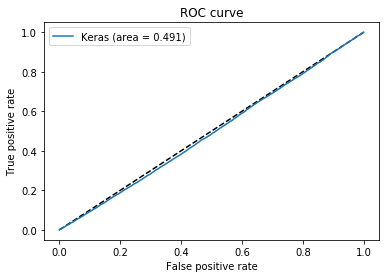

In [58]:
#"DN_"+str(Num_layers)+"_layer"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(activation_func)+"_activation_func_"

#%%time
layer_list = [3,4,5]
units_list = [300] #[100, 200, 300, 500]
init_learning_rate_list= [0.05,2e-5] #you can add more lr options when run on GPU
weight_decay_list=[0.00001]
#weight_decay_list=[0,0.00001]
activation_func_list = ['relu', 'tanh']

auc_deep = pd.DataFrame(columns=["layer","auc"])
i = 0

for layer in layer_list:
    for units in units_list:
        for learning_rate in init_learning_rate_list:
            for activation_func in activation_func_list:
                for weight_decay in weight_decay_list:
                    print("DN-",layer," layers", "LR-",learning_rate,"activation_func-", activation_func)  #better print out all parameters used for make pick out best model easy!!!!!!!!!!!!!
                    auc_score= tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=layer, units=units,learning_rate=learning_rate,weight_decay=weight_decay)
                    auc_deep.loc[i]=[layer,auc_score]
                    i+=1

In [59]:
# second run best

# DN- 4  layers LR- 0.05 activation_func- tanh 0.742
# DN- 4  layers LR- 0.05 activation_func- relu 0.737

# DN- 5  layers LR- 0.05 activation_func- relu 0.740
# DN- 5  layers LR- 0.05 activation_func- tanh 0.738

# DN- 3  layers LR- 0.05 activation_func- relu 0.738
# DN- 3  layers LR- 0.05 activation_func- tanh  0.734


# first round best
# DN- 5  layers LR- 0.05 activation_func- relu 0.742
# DN- 5  layers LR- 0.05 activation_func- tanh 0.744

# relu do not always outperform tanh




In [60]:
def tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=1, units=300, activation_func='tanh',learning_rate=2e-5,
                           metrics=['mean_squared_error'],batch_size=1000,epochs=10
                          ,weight_decay=1e-5):   
    model= tf.keras.Sequential()
    model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(layers.Dropout(0.5))
    
    for i in range(Num_layers):
        model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
        
        
    model.add(layers.Dense(1 ,activation='sigmoid'))

    #compile the model
    model.compile(tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9), #optimizer=tf.train.GradientDescentOptimizer(learning_rate),
                  loss = 'binary_crossentropy',# 'sparse_categorical_crossentropy',
                  metrics=metrics)
    # fit the model
    results = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, callbacks=[tb]) #
    
    #add AUC curve
    # credit: https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
    
    y_pred_keras = model.predict(X_test)[:, 0]
    print(model.summary())
    #print(y_pred_keras.shape)
    
    if (Num_layers==1):
        figure_Name = "NN_"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    else:
        figure_Name = "DN_"+str(Num_layers)+"_layer"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    
    plt.plot(results.history['loss'], label='train')
    plt.plot(results.history['val_loss'], label='test')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig(figure_Name+"_loss.png")
    plt.show()
    
    
#     Draw ROC 
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#     plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.savefig(figure_Name+"_ROC.png")
    plt.show()

Train on 175999 samples, validate on 44000 samples
Epoch 1/10
175999/175999 [==============================] - 16s 91us/sample - loss: 0.6828 - mean_squared_error: 0.2389 - val_loss: 0.6574 - val_mean_squared_error: 0.2271
Epoch 2/10
175999/175999 [==============================] - 17s 97us/sample - loss: 0.6670 - mean_squared_error: 0.2315 - val_loss: 0.6498 - val_mean_squared_error: 0.2237
Epoch 3/10
175999/175999 [==============================] - 14s 77us/sample - loss: 0.6542 - mean_squared_error: 0.2257 - val_loss: 0.6337 - val_mean_squared_error: 0.2163
Epoch 4/10
175999/175999 [==============================] - 12s 69us/sample - loss: 0.6404 - mean_squared_error: 0.2194 - val_loss: 0.6283 - val_mean_squared_error: 0.2142
Epoch 5/10
175999/175999 [==============================] - 12s 68us/sample - loss: 0.6296 - mean_squared_error: 0.2144 - val_loss: 0.6104 - val_mean_squared_error: 0.2061
Epoch 6/10
175999/175999 [==============================] - 16s 94us/sample - loss: 0.621

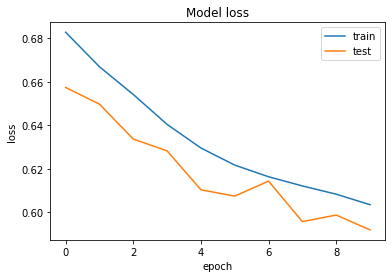

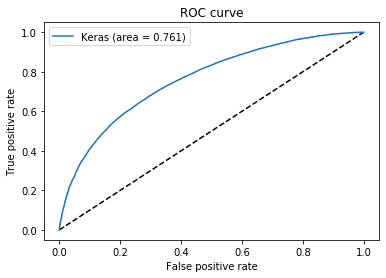

In [61]:
# try ep=10
# the model below is using the NN achi in paper on page 6
tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=4, units=300,learning_rate=0.05,weight_decay=1e-5)